In [1]:
import nltk
from nltk import word_tokenize, pos_tag , sent_tokenize
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio
import sklearn
import seaborn as sns
pio.renderers.default = "svg"
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from pywaffle import Waffle
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer 
nltk.download('averaged_perceptron_tagger')
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\lamari\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


# Présentation du Dataset et analyse des variables

In [2]:
corpus = pd.read_csv("C:/Users/lamari/Corona_NLP_train.csv",encoding='latin1')
df=corpus
df.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [3]:
#colonnes 
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [4]:
#info sur les colonnes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [7]:
#Variable sentiment
df.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

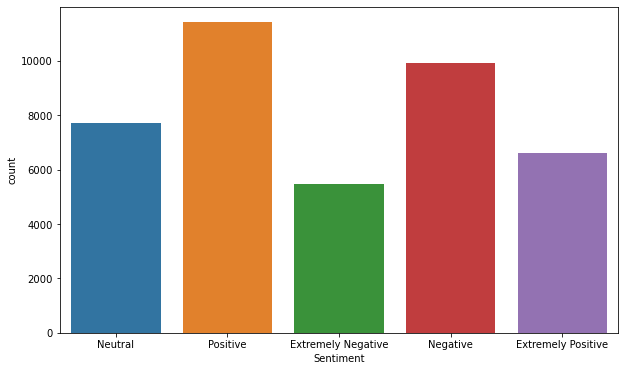

In [8]:
#SENTIMENT BARPLOT
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data = df);

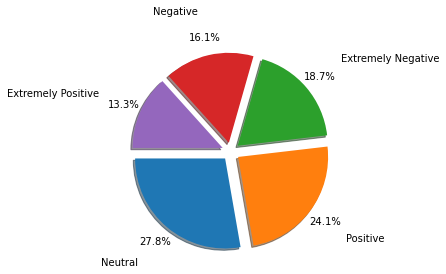

In [9]:
#sentiment 
plt.pie(corpus['Sentiment'].value_counts(),labels=(corpus['Sentiment'].unique()), explode = [0.1,0.1,0.1,0.1,.1],autopct ='%1.1f%%',shadow = True, startangle = 180, labeldistance = 1.5, pctdistance =1.2)

plt.axis('equal')
plt.show()

In [10]:
#VARIABLE LOCATION
df.Location.value_counts()

London                    540
United States             528
London, England           520
New York, NY              395
Washington, DC            373
                         ... 
I stay at home!             1
 #Newyork USA #America      1
Camden Town, London         1
perfect places              1
Vienna, VA, USA             1
Name: Location, Length: 12220, dtype: int64

# Classification Naive BAYES

- Classificateur MultinomialNB avec countvectorizer avec Ngram 1 

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(corpus['OriginalTweet'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, corpus['Sentiment'], test_size=0.25, random_state=5)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
from sklearn import metrics
predicted= MNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

45.18%


- Classificateur MultinomialNB avec countvectorizer avec Ngram 2

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv= CountVectorizer(stop_words='english' ,ngram_range=(2,2),tokenizer = token.tokenize)
text_counts=cv.fit_transform(corpus['OriginalTweet'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, corpus['Sentiment'], test_size=0.25, random_state=5)
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(X_train, Y_train)
from sklearn import metrics

accuracy_score = metrics.accuracy_score(MNB.predict(X_test), Y_test)
print('MultinomialNB = ' +str('{:04.2F}'.format(accuracy_score*100))+'%')

MultinomialNB = 40.52%


- Classificateur ComplementNB avec countvectorizer 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
token= RegexpTokenizer(r'[a-zA-Z0-9]+')
cv=CountVectorizer(stop_words='english' ,ngram_range=(1,1),tokenizer = token.tokenize)
text_counts=cv.fit_transform(corpus['OriginalTweet'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(text_counts, corpus['Sentiment'], test_size=0.25, random_state=5)

from sklearn.naive_bayes import ComplementNB
CNB = ComplementNB()
CNB.fit(X_train, Y_train)


from sklearn import metrics

predicted= CNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

45.79%


- Classificateur BernouilliNB avec countvectorizer 

In [16]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(X_train, Y_train)


from sklearn import metrics

predicted= BNB.predict(X_test)
accuracy_score = metrics.accuracy_score(predicted, Y_test)
print(str('{:04.2F}'.format(accuracy_score*100))+'%')

40.19%


- Différent algorithme naive bayes avec TF-IDF

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
text_counts_2 = tfidf.fit_transform(corpus["OriginalTweet"])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(text_counts_2, corpus['Sentiment'], test_size=0.25, random_state=42)
#
MNB.fit(x_train, y_train)
MNBaccuracy_score = metrics.accuracy_score(MNB.predict(x_test), y_test)
print('Multinominal NB = ' +str('{:04.2F}'.format(MNBaccuracy_score*100))+'%')
#
CNB.fit(x_train, y_train)
CNBaccuracy_score = metrics.accuracy_score(CNB.predict(x_test), y_test)
print('Complement  NB = ' +str('{:04.2F}'.format(CNBaccuracy_score*100))+'%')
BNB.fit(x_train, y_train)
BNBaccuracy_score = metrics.accuracy_score(BNB.predict(x_test), y_test)
print('Bernoulli NB = ' +str('{:04.2F}'.format(BNBaccuracy_score*100))+'%')


Multinominal NB = 35.34%
Complement  NB = 45.70%
Bernoulli NB = 43.57%


# Matrice de confusion

Text(0.5, 1.0, 'Confusion Matrix')

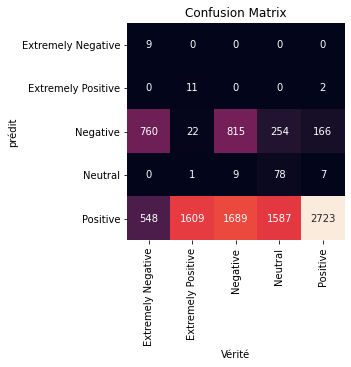

In [23]:

from sklearn.metrics import confusion_matrix

MNB.fit(x_train, y_train)
pred = MNB.predict(x_test)
mat = confusion_matrix(pred, y_test)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Vérité')
plt.ylabel('prédit')
plt.title("Confusion Matrix")

# Classificateur SVM

In [19]:

from sklearn.svm import LinearSVC
LSVC = LinearSVC()
#ON TF_idf data
print('On Tf_idf') 
LSVC.fit(x_train, y_train)
accuracy_score_lsvc = metrics.accuracy_score(LSVC.predict(x_test), y_test)
print('accuuracy_score_lsvc= ' + str('{:04.2F}'.format(accuracy_score_lsvc*100))+'%')
print('on countvectorizer data') 
LSVC.fit(X_train, Y_train)
accuracy_score_lsvc2 = metrics.accuracy_score(LSVC.predict(X_test), Y_test)
print('accuuracy_score_lsvc= ' + str('{:04.2F}'.format(accuracy_score_lsvc2*100))+'%')


On Tf_idf
accuuracy_score_lsvc= 56.19%
on countvectorizer data
accuuracy_score_lsvc= 53.38%


# Comparaison des classificateurs 

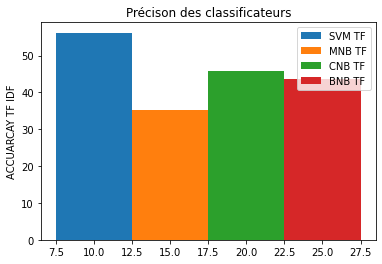

In [20]:
plt.bar(10,accuracy_score_lsvc*100,5, label="SVM TF")
plt.bar(15,MNBaccuracy_score*100,5, label="MNB TF")
plt.bar(20,CNBaccuracy_score*100,5, label="CNB TF")
plt.bar(25,BNBaccuracy_score*100,5, label="BNB TF")
plt.legend()
plt.ylabel('ACCUARCAY TF IDF')
plt.title('Précison des classificateurs')
plt.show()

# SVM Méthode 2 :

In [24]:
trainData= pd.read_csv("C:/Users/lamari/Corona_NLP_train.csv",encoding='latin1')
testData= pd.read_csv("C:/Users/lamari/Corona_NLP_test.csv",encoding='latin1')

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(trainData['OriginalTweet'])
test_vectors = vectorizer.transform(testData['OriginalTweet'])

In [26]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
# classification avec SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
t0 = time.time()
classifier_linear.fit(train_vectors, trainData['Sentiment'])
t1 = time.time()
prediction_linear = classifier_linear.predict(test_vectors)
t2 = time.time()
time_linear_train = t1-t0
time_linear_predict = t2-t1
# resultas
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
report = classification_report(testData['Sentiment'], prediction_linear, output_dict=True)
print('positive: ', report['Positive'])
print('negative: ', report['Negative'])

Training time: 727.143911s; Prediction time: 39.217175s
positive:  {'precision': 0.5677083333333334, 'recall': 0.6906019007391764, 'f1-score': 0.6231538828013341, 'support': 947}
negative:  {'precision': 0.5730337078651685, 'recall': 0.6368876080691642, 'f1-score': 0.6032757051865332, 'support': 1041}


# Tester SVM

In [27]:
tweet1 = "BE CALM A LOT OF GOOD THINGS ARE GOING TO HAPPEN"
tweet1_vector = vectorizer.transform([tweet1]) # vectorizing
print(classifier_linear.predict(tweet1_vector))

['Extremely Positive']


In [28]:
tweet2 = " I hate lockdown "
tweet2_vector = vectorizer.transform([tweet2]) # vectorizing
print(classifier_linear.predict(tweet2_vector))

['Extremely Negative']
